In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
x=df.values
data=x[:,:-1]

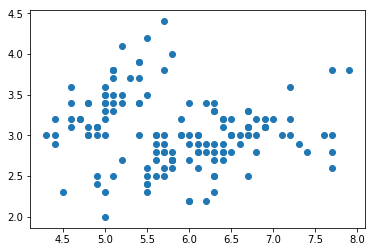

In [4]:
plt.scatter(data[:,0],data[:,1])
plt.show()

In [5]:
def initialise(K):
    k=K
    clusters={}
    for i in range(k):
        centre=100*np.random.randn(*data[0].shape)
        points=[]
        cluster={
        'centre':centre,
        'points':points, 
        }
        clusters[i]=cluster
        
    return clusters

    

In [6]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [7]:
def assignPointsToCluster(clusters,k):
    for ix in range(data.shape[0]):
        dist=[]
        for j in range(k):
            dist.append(distance(data[ix],clusters[j]['centre']))
        group=np.argmin(dist)
        clusters[group]['points'].append(data[ix])
        
    return clusters    
def updateClusters(clusters,k):
    for i in range(k):
        pts=np.array(clusters[i]['points'])
        if pts.shape[0]>0:
            u=np.mean(pts,axis=0)
            clusters[i]['centre']=u
            clusters[i]['points']=[]
        return clusters      

def plotClusters(clusters,k):
    print(k)
    plt.figure()
    for i in range(k):
        pts=np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1])
        except:
            pass
        centre=clusters[i]['centre']
        print(centre)
        plt.scatter(centre[0],centre[1],marker="*",c='black') 
  
    plt.show()    

In [15]:
def make_final_cluster(cluster,k,iterations=10):
    for i in range(iterations):
        cluster=assignPointsToCluster(cluster,k)
        cluster=updateClusters(cluster,k)
    cluster=assignPointsToCluster(cluster,k)    
    return cluster    
  
def errorr(cluster,k):
    err=0;
    for i in range(k):
        pts=np.array(cluster[i]['points'])
        if pts.shape[0]>0:
             err+=np.sum((pts-cluster[i]['centre'])**2)
                
    return err
        
def elbow_method():
    m=data.shape[0]
    x=[]
    y=[]
    for i in range(1,m+1):
        x.append(i)
        clu=initialise(i)
        clu=make_final_cluster(clu,i)
        #plotClusters(clu,i)
        err=errorr(clu,i)
        y.append(err)
    return x,y    
        
        
        
        
        
        

In [9]:
x,y=elbow_method()

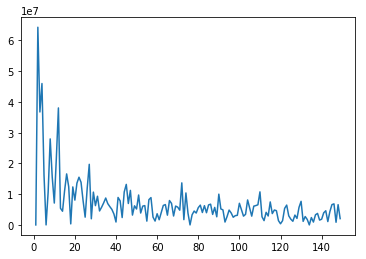

In [10]:
plt.plot(x,y)
plt.show()


In [16]:
from sklearn.cluster import KMeans

In [17]:
xx=[]
yy=[]

In [18]:
import matplotlib
import matplotlib.ticker

In [19]:
for i in range(1,data.shape[0]+1):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
    centre=kmeans.cluster_centers_
    labels=kmeans.labels_
    err=0
    for j in range(labels.shape[0]):
        err+=error(data[j],centre[labels[j]])
    yy.append(err)
    xx.append(i)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (146) found smaller than n_clusters (147). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (146) found smaller than n_clusters (148). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (146) found smaller than n_clusters (149). Possibly due to duplicate points in X.
  return_n_iter=True)


In [20]:
def error(x1,x2):
    return np.sum((x1-x2)**2)

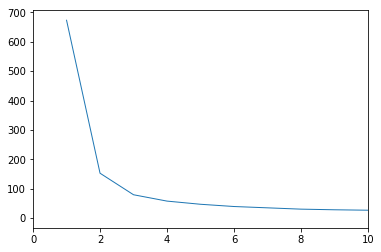

In [22]:
plt.plot(xx,yy,linewidth=1)
plt.xlim(0,10)
plt.show()